In [2]:
import os, sys
import warnings
from CRS_funcs import AT_diff_barchart, AT_diff_TS, temporal_profile_for_practices, display_plots
# relative path in git repo 
input_dir="time_series/NI/merged/"

# 2016-2019 time series of vegetation indices to identify cover crops (CC) and crop residue (CR) on ASA plots (treatment) vs Test plots (control):  
- Vegetation Indices: maximize separation of features of interest.  
- Limited to indices using wavelengths/bands covered by Sentinel AND Landsat (can't use Sentinel's red-edge bands).  

## <b>Cover crops:</b> identify CC on ASA plots (with standing CR) from Test plots without CC (with grazed CR)  
- <b>Temporal window:</b> NOV to FEB - After postrera harvest around November, cover crops are planted on ASA plots and die off by February in dry years, but can last as long as May.  
- <b>Spectral window:</b> The dominant factors controlling live cover crop vegetation reflectance are chlorophyll, absorption of red and blue light, reflection of NIR light in the spongy mesophyll that comprises the leaf's internal structure, and increased absorption of visible and SWIR light from increased leaf moisture content. 
1) <b>Enhanced Vegetation Index 2 (EVI2)</b> = 2.5 * ( NIR - RED) / ( NIR + 2.4 * RED + 1.0 )    
2) <b>Green-Chlorophyll Vegetation Index (GCVI)</b> = (NIR – GREEN) / (NIR + GREEN)  

In ASA plots around November to February, crops should exhibit higher EVI2 and GCVI values than standing residue, as the slope of red and green to NIR is steeper for cover crops, caused by chlorophyll absorption of visible light and reflecting of NIR light in the spongy mesophyll. When cover crops are planted on ASA plots after postrera harvest, ASA EVI2 should see less of an EVI2 drop than Testigo, which shouldn't have any green vegetation. As the cover crops die near the end of the cover crop visibility window, ASA's EVI2 values should near Testigo values.


## <b>Crop residue:</b> differentiate ASA plots with standing crop residue from Test plots with grazed residue (leaving soil)  
- <b>Temporal window:</b> FEB to MAY - CR is left on both Test and ASA plots. Grazing occurs on Test, so once residue has been grazed on Test & CC dies on ASA around Feb, Test plot should have soil and ASA plot should have standing residue  
- <b>Spectral window:</b>  Soil and dry vegetation look similar in visible and NIR wavelengths. However, cellulose in dry vegetation absorbs SWIR2 light more than soil, leading to lower reflectance in ASA's standing residue in the SWIR2 band than Testigo's soil.  
1) <b>Normalized Difference Tillage Index (NDTI)</b> = (SWIR1-SWIR2) / (SWIR1+SWIR2) First, the most prominent spectral difference between NPV and soil is the cellulose absorption feature in SWIR 2 wavelengths.   
2) <b>Normalized Burn Ratio (NBR)</b> = (NIR1-SWIR2) / (NIR1+SWIR2) 

In ASA plots around February to May, standing residue's cellulose absorption from the SWIR2 band should show a steeper slope between SWIR1 to SWIR2 bands and produce higher NDTI as well as NBR values in ASA plot pixels. Within this broad crop residue visibility window, as grazing occurs on Testigo plots, Testigo NDTI values should drop at a higher rate and reach a lower minimum NDTI value than ASA plots.

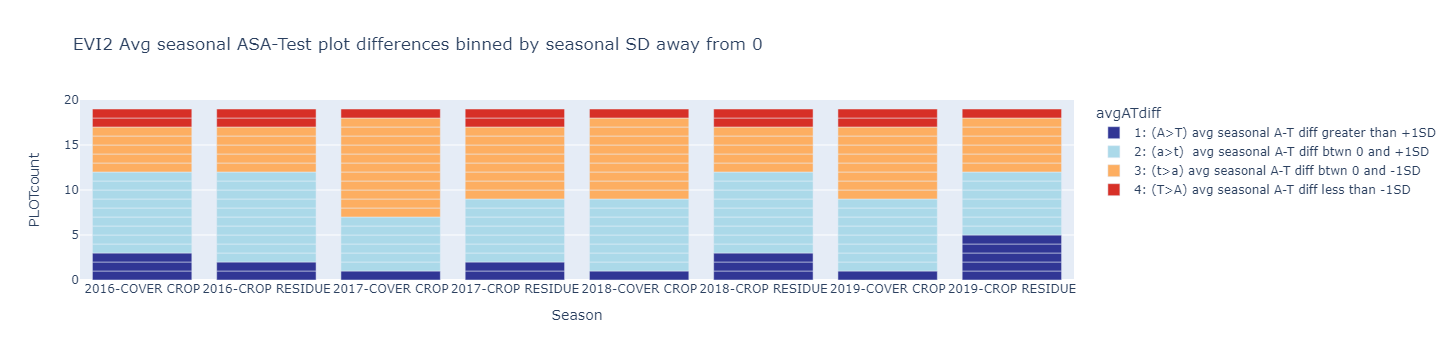

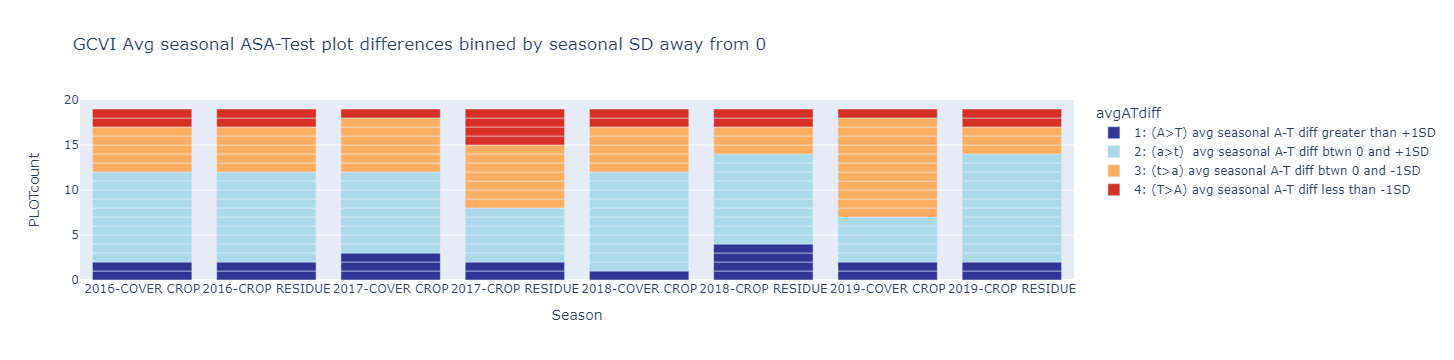

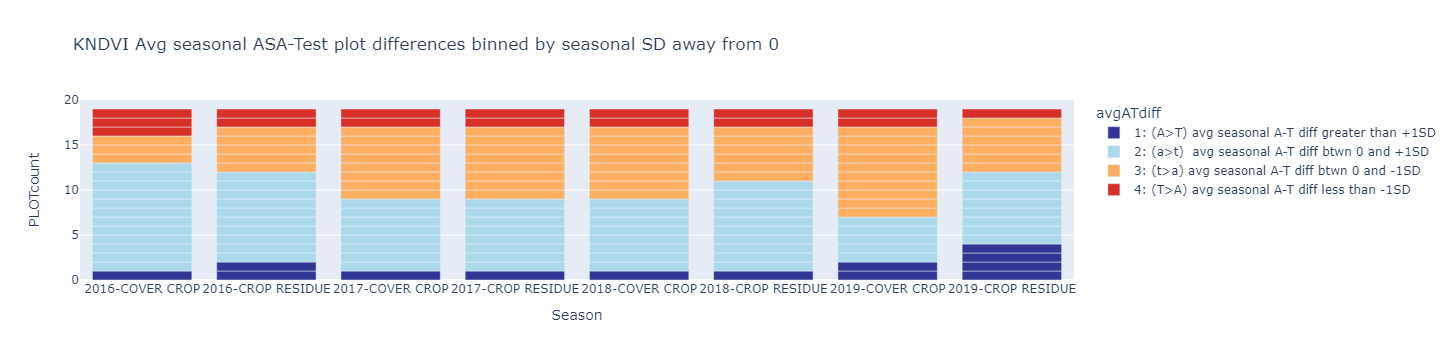

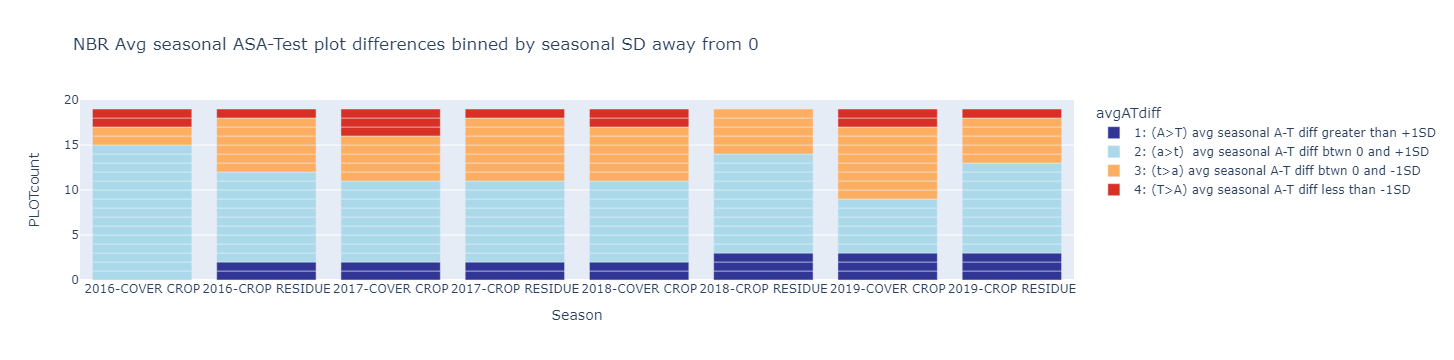

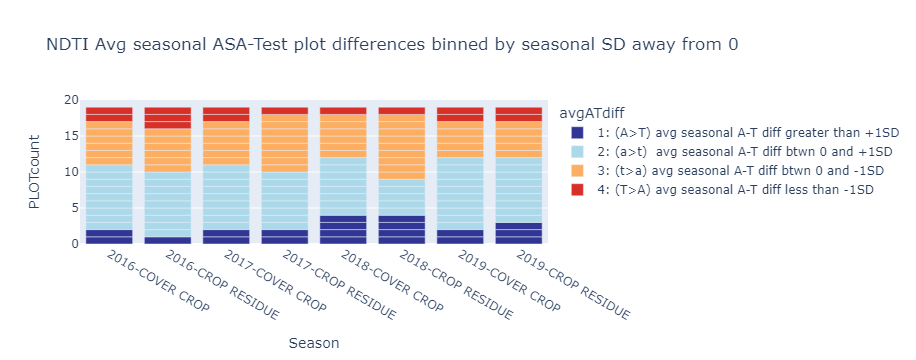

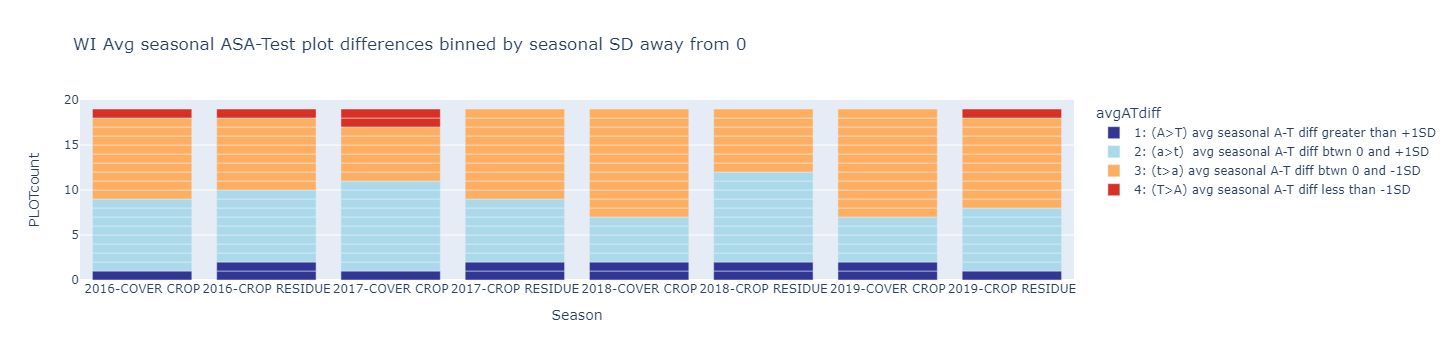

In [2]:
##### Run this cell as is to run AT_diff_SZN_barchart() for all VIs
for dat in sorted(os.listdir(input_dir)):
        if dat.endswith('_merged_SZN_stats.csv'):
            AT_diff_barchart(input_dir + dat)

<b>List of NI plot FieldIDs with practice data:</b> NI_147, NI_192, NI_218, NI_248, NI_258, NI_295, NI_307, NI_313, NI_385, NI_407, NI_470, NI_480, NI_482, NI_581, NI_599, NI_634, NI_660, NI_697, NI_698 

- change FieldID, keep quotes

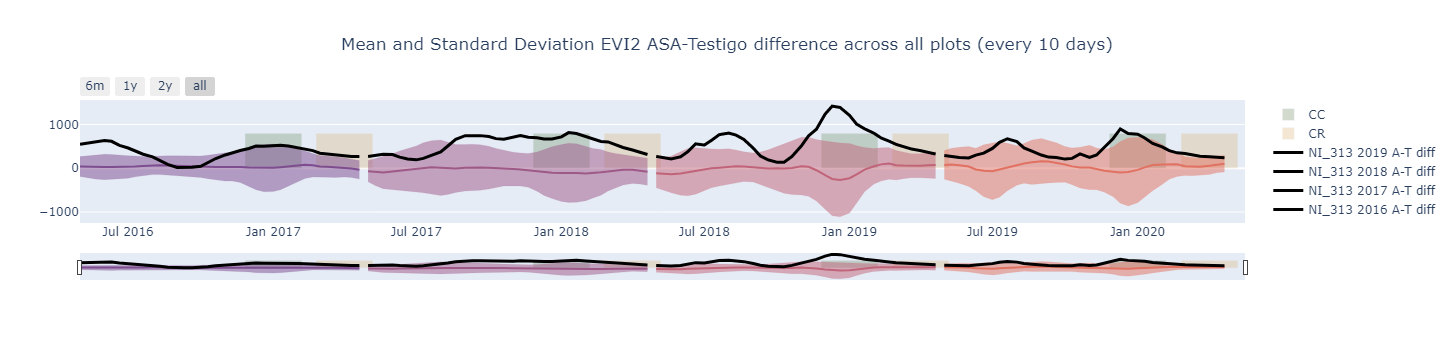

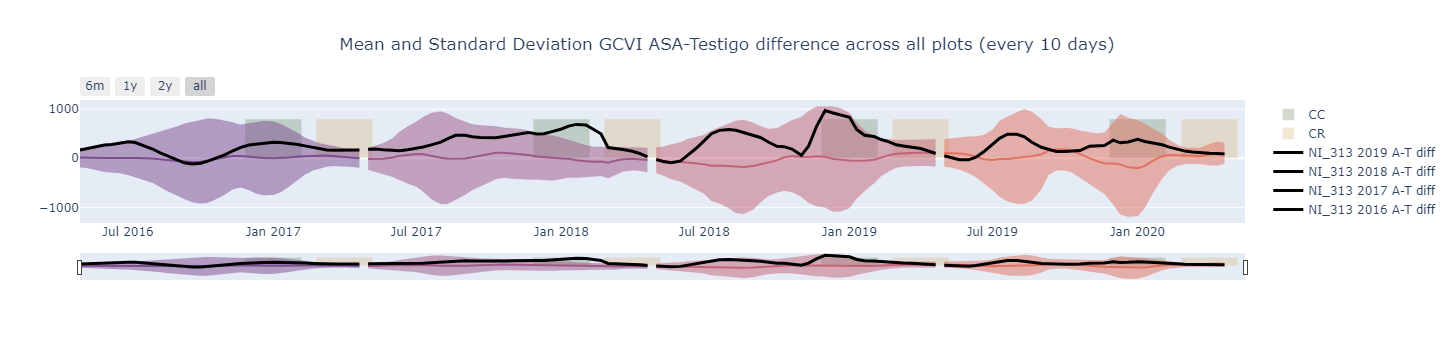

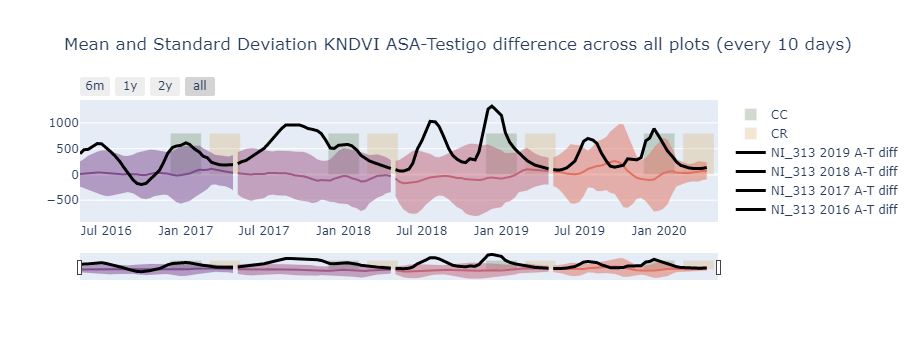

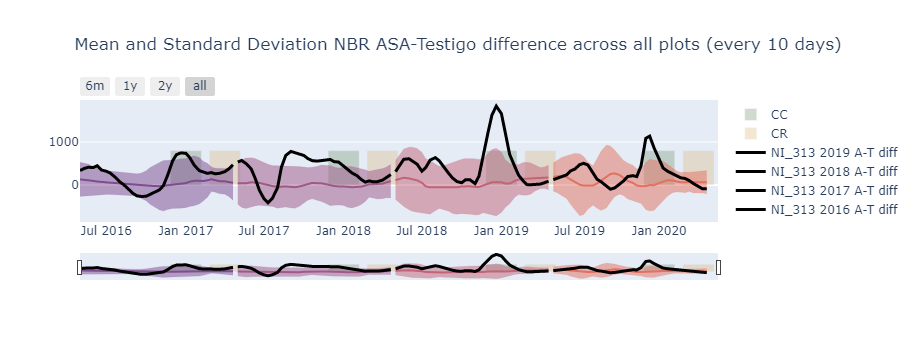

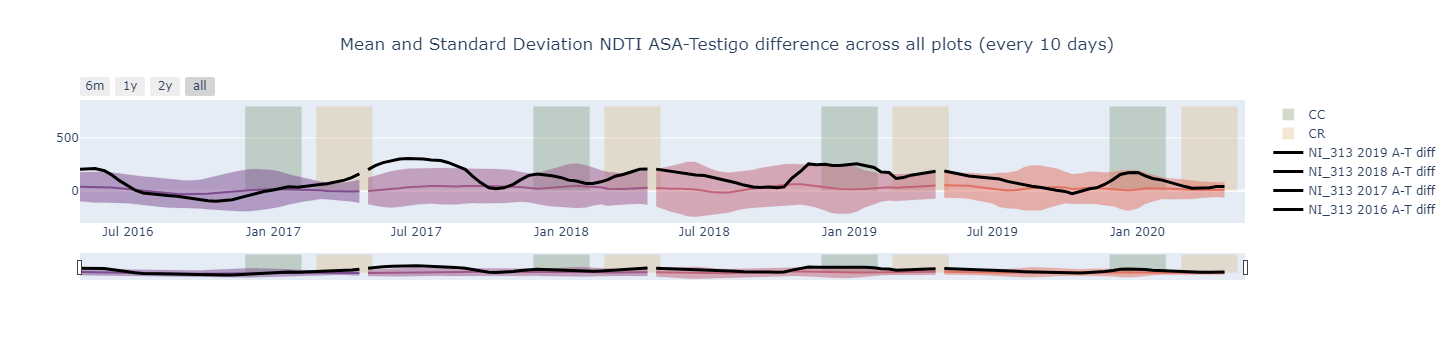

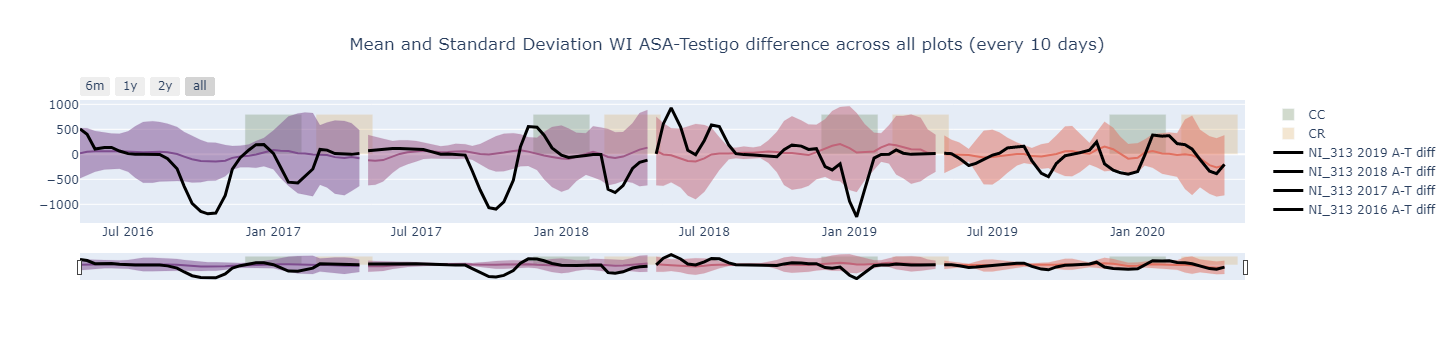

In [3]:
FieldID="NI_313"
## do not edit below ######################
for i in sorted(os.listdir(input_dir)):
        if i.endswith('_merged.csv'):
            AT_diff_TS(input_dir + i, FieldID)

<b>Options for single input Nicaragua grid:</b> '002225', '002387', '002388', '002548', '002549', '002550'  
<b>Options for list of Nicaragua VIs</b> = ['evi2', 'gcvi', 'kndvi', 'ndti', 'wi', 'nbr']

Cultivo                       \
Temporada                             1.Primera 2.Postrera 1.Primera   
Ano                                        2016       2016      2017   
ID_Prod Parcela Nom.Cob                                                
NI_147  ASA     maíz-frijol-canavalia      Maiz     Frijol      Maiz   
        Testigo no                         Maiz     Frijol      Maiz   
NI_192  ASA     maíz-frijol-canavalia      Maiz     Frijol      Maiz   
        Testigo no                         Maiz     Frijol      Maiz   
NI_218  ASA     maíz-frijol-canavalia      Maiz     Frijol      Maiz   
        Testigo no                         Maiz     Frijol      Maiz   

                                                                       \
Temporada                             2.Postrera 1.Primera 2.Postrera   
Ano                                         2017      2018       2018   
ID_Prod Parcela Nom.Cob                                                 
NI_147  ASA     maíz-frijol-canavalia     Frijol      Maiz     Frijol   
        Testigo no                        Frijol      Maiz     Frijol   
NI_192  ASA     maíz-frijol-canavalia     Frijol      Maiz     Frijol   
        Testigo no                        Frijol      Maiz     Frijol   
NI_218  ASA     maíz-frijol-canavalia     Frijol      Maiz     Frijol   
        Testigo no                        Frijol      Maiz     Frijol   

                                                            
Temporada                             1.Primera 2.Postrera  
Ano                                        2019       2019  
ID_Prod Parcela Nom.Cob                                     
NI_147  ASA     maíz-frijol-canavalia    Frijol     Frijol  
        Testigo no                       Frijol     Frijol  
NI_192  ASA     maíz-frijol-canavalia      Maiz     Frijol  
        Testigo no                         Maiz     Frijol  
NI_218  ASA     maíz-frijol-canavalia      Maiz     Frijol  
        Testigo no                         Maiz     Frijol

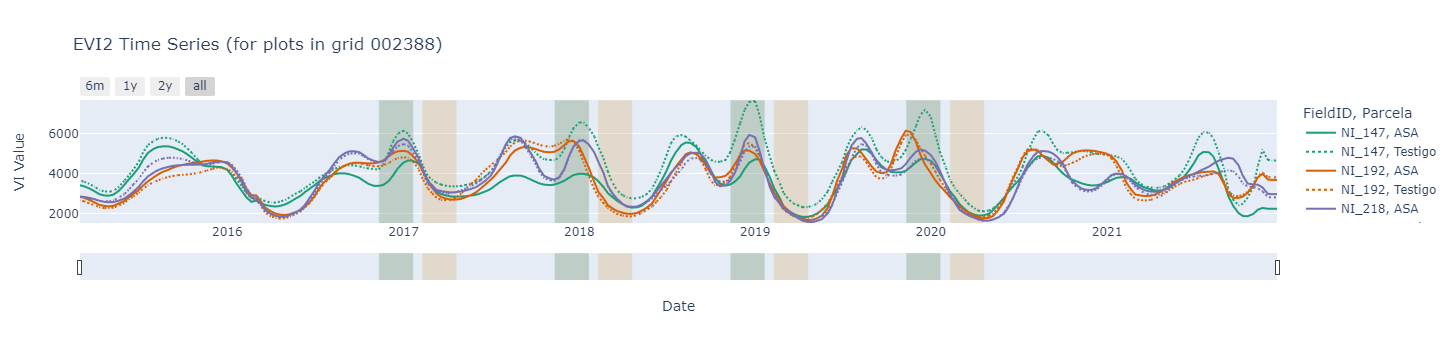

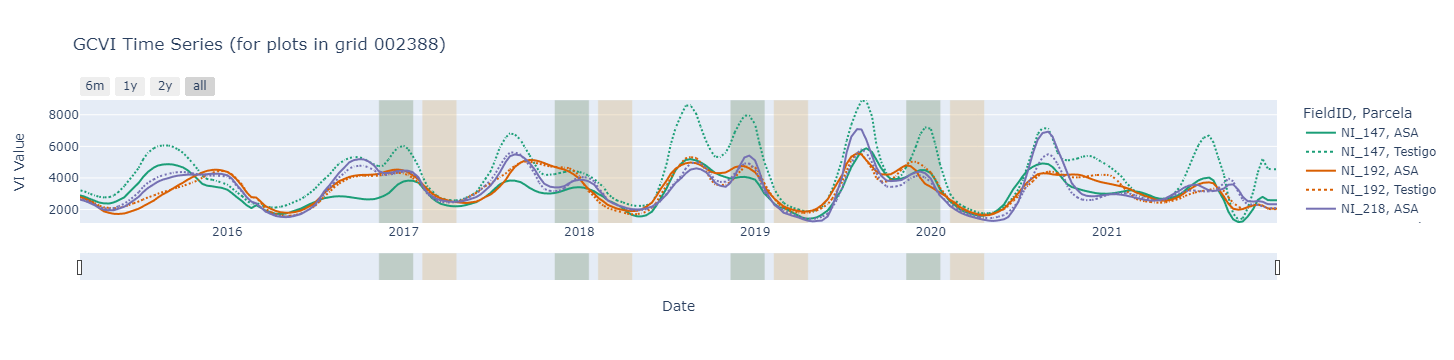

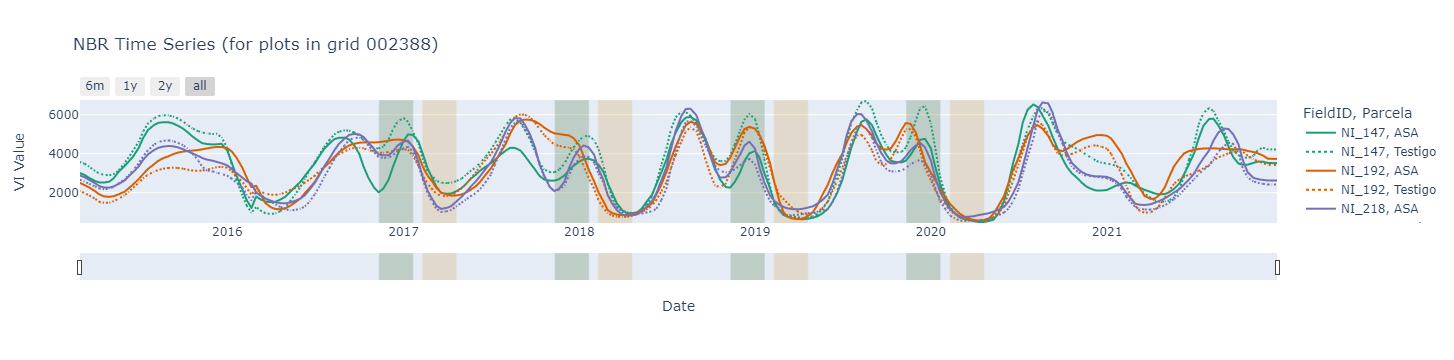

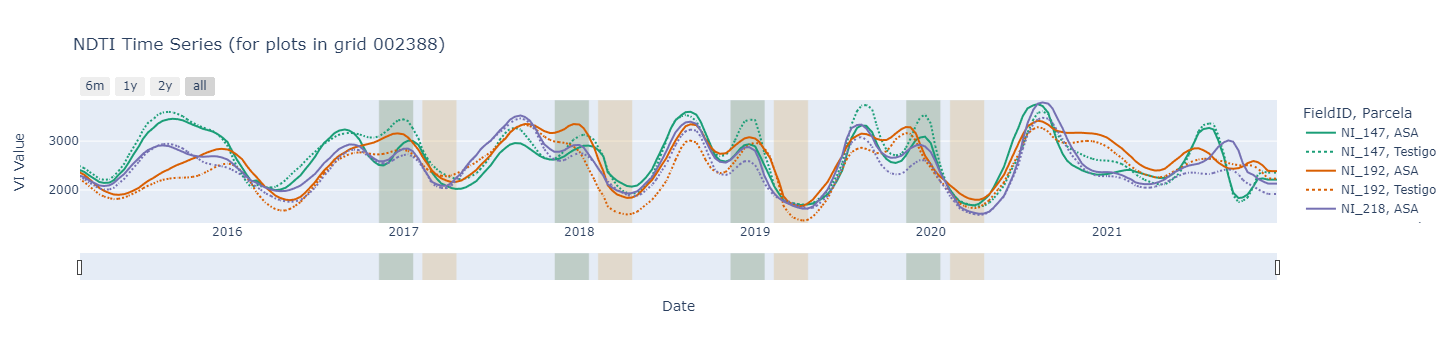

Map(center=[13.153353148000065, -86.04810727599994], close_popup_on_click=False, controls=(AttributionControl(…

In [10]:
# NICARAGUA
display_plots('002388', ['evi2', 'gcvi', 'nbr', 'ndti'])

<b>Options for single input El Salvador grid:</b>  '001892', '001972', '002047', '002056', '002127'  
<b>Options for list of El Salvador VIs:</b>  ['evi2', 'gcvi', 'kndvi', 'ndti', 'wi', 'nbr']

Cultivo                                  \
Temporada                      1.Primera                   Perenne         
Ano                                 2017  2016  2019  2018    2017  2016   
ID_Prod        Parcela Nom.Cob                                             
Part/SV-Bbidgt ASA     NaN          Maiz  Maiz  Maiz  Maiz     NaN   NaN   
               Testigo NaN          Maiz  Maiz  Maiz  Maiz     NaN   NaN   
Part/SV-LAx5RV ASA     NaN           NaN   NaN   NaN   NaN    Cafe  Cafe   
               Testigo NaN           NaN   NaN   NaN   NaN    Cafe  Cafe   
Part/SV-MzPH4V ASA     NaN           NaN   NaN   NaN   NaN     NaN   NaN   
               Testigo NaN           NaN   NaN   NaN   NaN     NaN   NaN   
Part/SV-mZD9s4 ASA     NaN          Maiz  Maiz  Maiz  Maiz     NaN   NaN   
               Testigo NaN          Maiz  Maiz  Maiz  Maiz     NaN   NaN   

                                            
Temporada                                   
Ano                             2019  2018  
ID_Prod        Parcela Nom.Cob              
Part/SV-Bbidgt ASA     NaN       NaN   NaN  
               Testigo NaN       NaN   NaN  
Part/SV-LAx5RV ASA     NaN      Cafe  Cafe  
               Testigo NaN      Cafe  Cafe  
Part/SV-MzPH4V ASA     NaN       NaN   NaN  
               Testigo NaN       NaN   NaN  
Part/SV-mZD9s4 ASA     NaN       NaN   NaN  
               Testigo NaN       NaN   NaN

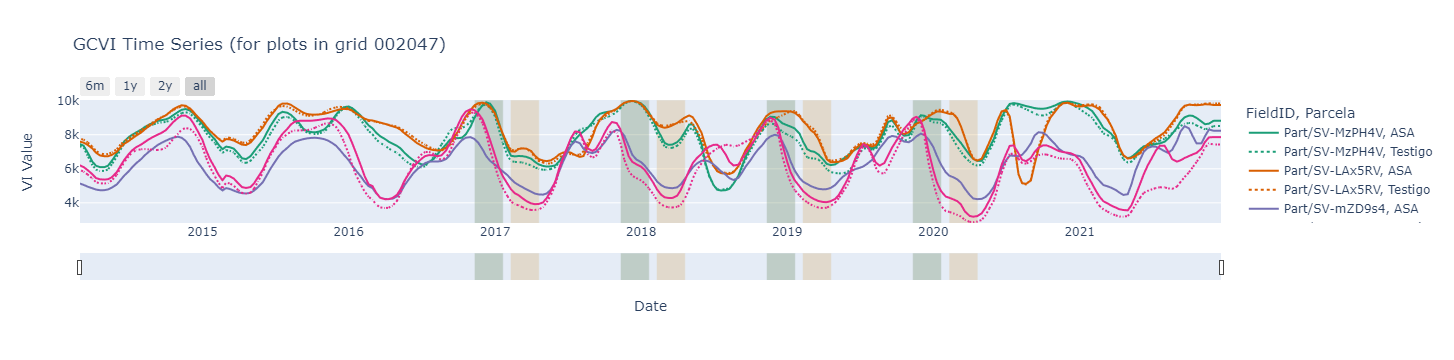

Map(center=[13.79890793900006, -89.80173910299999], close_popup_on_click=False, controls=(AttributionControl(o…

In [6]:
# EL SALVADOR 
display_plots('002047', ['gcvi'])